# Машинное обучение и анализ данных

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

## PCA

In [5]:
from sklearn.decomposition import PCA

In [7]:
F = pd.read_csv('2/2-1-1.csv', header=None)

In [8]:
pca = PCA(n_components=2, svd_solver='full')

In [9]:
pc2 = pca.fit(F).transform(F)

In [10]:
pc2[0]

array([ 22.90768784, -14.30123929])

In [11]:
disp_expl = np.round(np.cumsum(pca.explained_variance_ratio_),3)

In [12]:
disp_expl

array([0.459, 0.79 ])

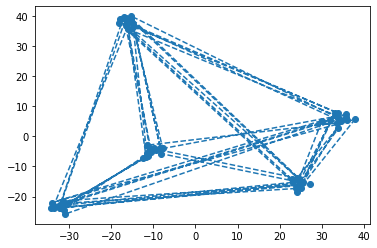

In [13]:
plt.plot(pc2[:60,0], pc2[:60, 1],'--o')

In [15]:
Z = pd.read_csv('2/2-2-1.csv', delimiter=';', header=None)
Fi = pd.read_csv('2/2-2-2.csv', delimiter=';', header=None)


In [16]:
Fsh = np.dot(Z, Fi.transpose())

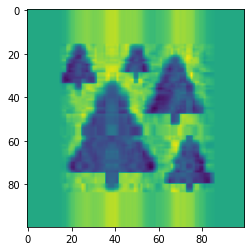

In [17]:
plt.imshow(Fsh)

## Linear Regression

# skylearn approach

In [19]:
queue_df = pd.read_csv('3/3-1-1.csv', usecols=[1,2])

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
reg = LinearRegression()
reg.fit(np.asarray(queue_df['X']).reshape(-1, 1), queue_df['Y'])
reg.coef_

array([2.56927711])

In [22]:
r2_score(queue_df['Y'], reg.predict(np.asarray(queue_df['X']).reshape(-1, 1)))

0.8950149905366087

In [23]:
MX = queue_df['X'].mean()
MY = queue_df['Y'].mean()

In [24]:
MX, MY

(14.2, 34.8)

In [25]:
Teta1 = 0
Teta0 = 0
Teta1Div = 0
for i in range(10):
    Teta1+=(queue_df['X'][i] - MX)*(queue_df['Y'][i] - MY)
    Teta1Div+=((queue_df['X'][i] - MX)*(queue_df['X'][i] - MX))
Teta1/=Teta1Div

In [551]:
Teta0 = MY - MX * Teta1

In [556]:
Teta1, Teta0

(2.569277108433735, -1.6837349397590344)

In [563]:
R = 0
Rdiv = 0
for i in range(10):
    R += (queue_df['Y'][i] - (queue_df['X'][i] * Teta1 + Teta0))**2
    Rdiv += (queue_df['Y'][i] - MY) * (queue_df['Y'][i] - MY)
R/=Rdiv
R = 1 - R

In [564]:
R

0.8950149905366087

In [734]:
candies = pd.read_csv('3-2-1.csv')
NLN = 44
OD = 2
NNN_VALS = candies.loc[NLN,:][1:]
OD_VALS = candies.loc[OD,:][1:]
X_train = candies.drop([OD, NLN])

Y_train = pd.DataFrame(X_train['winpercent'])
X_train = X_train.drop(['competitorname','winpercent','Y'] , axis=1)

In [735]:
X_test = (pd.DataFrame([OD_VALS, NNN_VALS]))
Y_test = pd.DataFrame(X_test['winpercent'])
X_test = X_test.drop(['winpercent','Y'] , axis=1)

In [737]:
reg = LinearRegression().fit(X_train, Y_train)

In [723]:
reg.predict(X_test)

array([[35.81785213],
       [40.5568858 ]])

In [741]:
chocolate = np.asarray([0,1,0,1,1,0,1,1,1,0.848,0.594]).reshape(1,11)
chocolate = pd.DataFrame(chocolate)
reg.predict(chocolate)

array([[46.24325994]])

## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('4/4-1-1.csv')
X_train = np.array(df[['X', 'Y']])
y_train = np.array(df[['Class']])
y_train = [i[0] for i in y_train]

In [41]:
neigh = KNeighborsClassifier(n_neighbors = 1, p = 2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
neigh.kneighbors([[30, 30]], 1)[0][0][0]

21.633307652783937

In [43]:
neigh.kneighbors([[30, 30]], 3)[1]+1

array([[5, 3, 2]])

In [46]:
neigh = KNeighborsClassifier(n_neighbors = 3, p = 2)
y_train = np.array(y_train).reshape(10,)
neigh.fit(X_train, y_train)
neigh.predict([[30, 30]])[0]

1

In [48]:
neigh = KNeighborsClassifier(n_neighbors = 1, p = 1)
neigh.fit(X_train, y_train)

neigh.kneighbors([[30, 30]], 1)[0][0]

array([30.])

In [49]:
neigh.kneighbors([[30, 30]], 3)[1] + 1

array([[5, 3, 2]])

In [50]:
neigh = KNeighborsClassifier(n_neighbors = 3, p = 1)
neigh.fit(X_train, y_train.reshape(10, ))
neigh.predict([[30, 30]])

array([1])

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
train = pd.read_csv('6/candy-data.csv', index_col='competitorname')
test = pd.read_csv('6/candy-test.csv', index_col='competitorname')
train.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [53]:
predictors = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']
exc_candies = ['Kit Kat', 'Milk Duds', 'Sour Patch Tricksters']

In [54]:
train = train.drop(exc_candies, axis=0)
train.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,Y
competitorname,,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


In [55]:
train_y = train['Y']
train_x = train[predictors]

In [56]:
model = LogisticRegression(random_state = 2019, solver = 'lbfgs')
model.fit(train_x, train_y)

LogisticRegression(random_state=2019)

In [57]:
test_y = test['Y']
test_x = test.drop(['Y'], axis=1)

In [58]:
names = [i for i in test_x.index]
probas = model.predict_proba(test_x)
final = []
for i in range(len(names)):
    final.append((names[i], probas[i][0], probas[i][1]))
final

[('Sugar Babies', 0.7444285752702011, 0.2555714247297988),
 ('Sugar Daddy', 0.6441758147234703, 0.3558241852765297),
 ('Super Bubble', 0.6915451126932719, 0.30845488730672815),
 ('Swedish Fish', 0.6359323193948363, 0.36406768060516365),
 ('Tootsie Pop', 0.24339882790879763, 0.7566011720912024),
 ('Tootsie Roll Juniors', 0.33235199538162996, 0.66764800461837),
 ('Tootsie Roll Midgies', 0.384877411653219, 0.615122588346781),
 ('Tootsie Roll Snack Bars', 0.23653832570945954, 0.7634616742905405),
 ('Trolli Sour Bites', 0.6890033984805324, 0.31099660151946756),
 ('Twix', 0.5854156780292891, 0.41458432197071093),
 ('Twizzlers', 0.6819110475655829, 0.31808895243441715),
 ('Warheads', 0.8693278681918634, 0.13067213180813664),
 ('Welchs Fruit Snacks', 0.688679763995574, 0.31132023600442604),
 ('Werthers Original Caramel', 0.48800411997458604, 0.511995880025414),
 ('Whoppers', 0.2631526761394697, 0.7368473238605303)]

## SVM

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import f1_score
from imutils import paths
import numpy as np
import cv2
import os

In [60]:
imagePaths = sorted(list(paths.list_images('7/train')))

In [61]:
# Функция, для чтение данных о изображении в формате 8 x 8 x 8
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [62]:
# Чтение изображений и инициализация data и labels
data = []
labels = []
for i in range(len(imagePaths)):
    label = imagePaths[i].split('/')[-1].split(".")[0]
    labels.append(label)
    image = cv2.imread(imagePaths[i], 1)
    data.append(extract_histogram(image))

In [63]:
# Нормализация label'ов к 0 и 1
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)

In [64]:
# Поделим данные в соотношении 75 25
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=9)

In [66]:
# Инициализируем модель и положим данные для обучения
from sklearn.svm import LinearSVC
model = LinearSVC(random_state = 9, C = 0.51)
model.fit(trainData, trainLabels)

LinearSVC(C=0.51, random_state=9)

In [67]:
answers = model.predict(testData)

In [68]:
model.coef_[0][256], model.coef_[0][370], model.coef_[0][123]

(0.008893233782127585, -0.043732497920149264, 9.731199155506382e-06)

In [69]:
f1_score(testLabels, answers, average='macro') # среднее значение F1

0.6103896103896105

## Decisions Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
df_all = pd.read_csv('8/diabetes.csv')
n = 690
df_690 = df_all[0:n]

In [72]:
k = n - sum(df_690['Outcome'])
k

453

In [73]:
responses = df_690['Outcome']
data_690 = df_690.loc[:, df_690.columns!='Outcome']

n_train = int(80/100 * n)
responses_train = responses[0 : n_train]
responses_test = responses[n_train :]
data_train = data_690[0 : n_train]
data_test = data_690[n_train : ]

In [74]:
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=20, random_state=2020)
model.fit(data_train, responses_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, random_state=2020)

In [75]:
depth = model.get_depth()
depth

6

In [76]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(data_train.columns)
export_graphviz(model, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

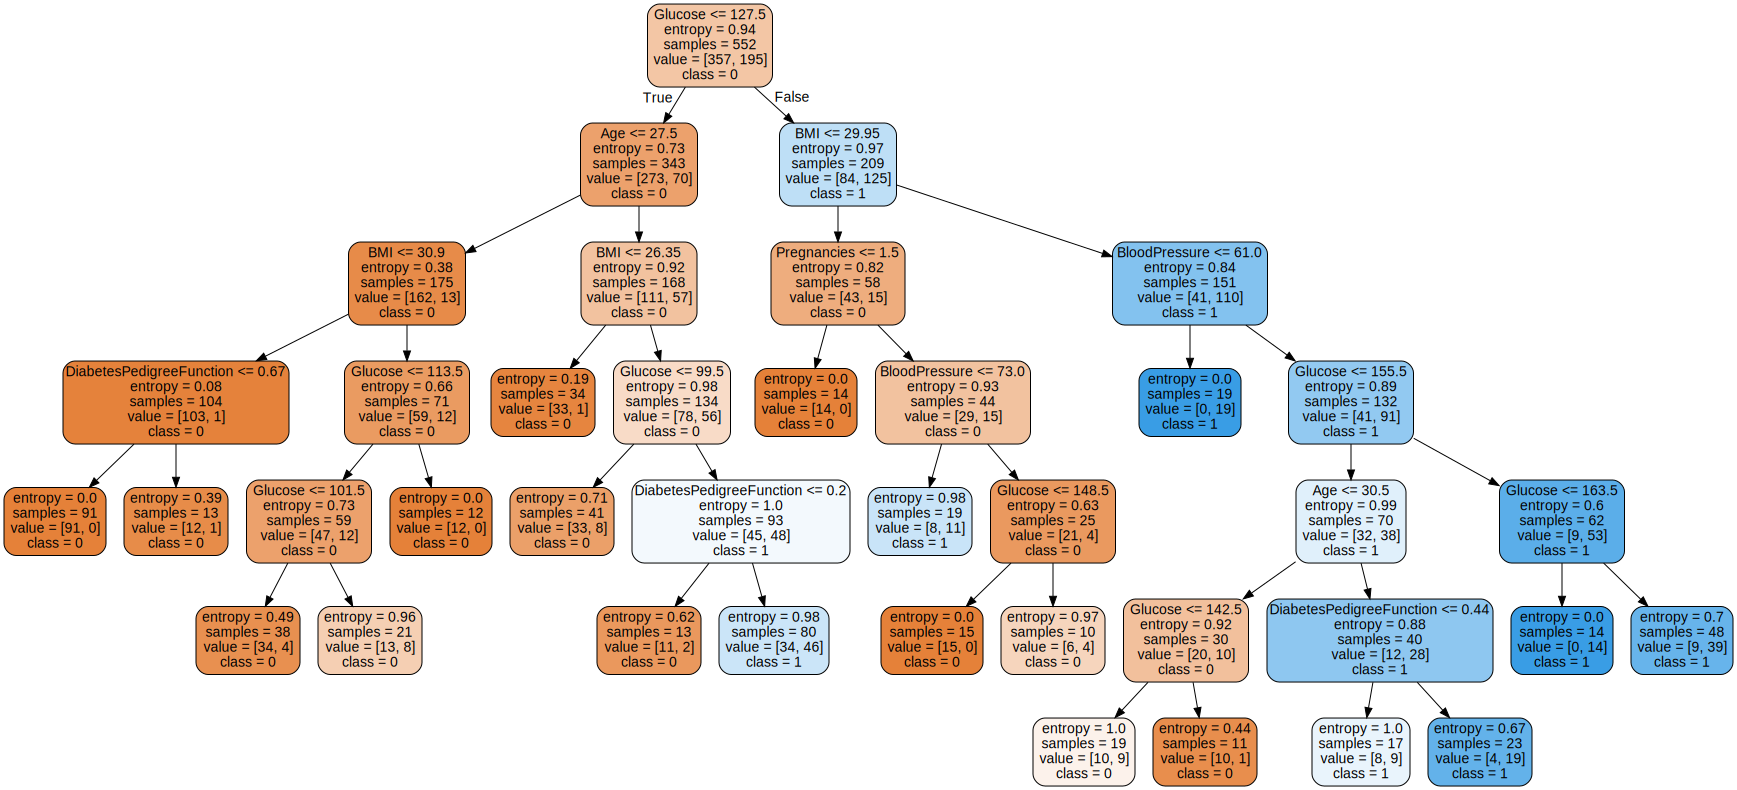

In [77]:
graphviz.Source(dot_graph)

In [78]:
model.score(data_test, responses_test)

0.7898550724637681

In [79]:
f1_score(model.predict(data_test), responses_test, average='macro') # среднее значение F1

0.7534955343393901

In [80]:
df_all = df_all.loc[:, df_all.columns!='Outcome']
entry = np.array([df_all.iloc[729].tolist()])

In [81]:
f = model.predict
f(entry)[0]

0

## K Means

In [82]:
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# KMeans(n_clusters=3, init=centroid, max_iter=100, n_init=1)

In [83]:
ncols = 4
df = pd.read_csv('9/data.csv', delimiter=',', usecols=range(1, ncols - 1))
df.head()

,X,Y
0,16,12
1,5,5
2,14,5
3,8,2
4,2,18


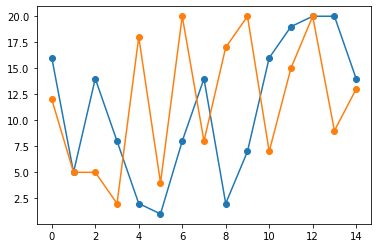

In [84]:
plt.plot(df, marker='o')
plt.show()

In [85]:
model = KMeans(n_clusters=3, init=np.array([[11.8, 11.6], [8.5, 9.83], [14.0, 14.5]]), max_iter=100, n_init=1)

In [86]:
model.fit(df)

KMeans(init=array([[11.8 , 11.6 ],
       [ 8.5 ,  9.83],
       [14.  , 14.5 ]]),
       max_iter=100, n_clusters=3, n_init=1)

In [87]:
clusters = model.labels_
clusters

array([2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2], dtype=int32)

In [88]:
alldistances = model.fit_transform(df)
alldistances

array([[ 6.01664358, 13.53698637,  5.07718207],
       [ 9.47628619,  6.5       , 14.73469074],
       [ 1.26491106, 12.97112177, 11.66666667],
       [ 7.65506368, 10.54751155, 15.84648577],
       [17.11724277,  7.01783442, 12.07384685],
       [13.57939616,  7.15891053, 18.15060452],
       [15.2118375 , 10.54751155,  6.86375343],
       [ 1.84390889, 11.88486432,  8.66666667],
       [16.44384383,  6.02079729, 12.00462874],
       [15.6588633 , 10.0623059 ,  7.75313557],
       [ 1.78885438, 14.08012784,  9.87139526],
       [ 9.92975327, 16.97792685,  5.27046277],
       [14.89295135, 19.67866865,  6.86375343],
       [ 6.26099034, 17.61391495,  9.73538791],
       [ 6.81175455, 11.67261753,  3.66666667]])

In [89]:
import math
cluster = 0 # сюда пишем номер кластера из задания
s = 0
count = 0
for i in range(0,len(clusters)):
  if (clusters[i] == cluster): 
    count+=1
    s += alldistances[i][cluster]
print(s/count) #ответ на последний вопрос про расстояния

3.762745671625408


## Ansemble Methods
## Multiclass Classification

In [90]:
from imutils import paths
import cv2

In [91]:
imagePaths = sorted(list(paths.list_images('10/train')))

In [92]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [93]:
# Чтение изображений и инициализация data и labels
data = []
labels = []
for i in range(len(imagePaths)):
    label = imagePaths[i].split('/')[-1].split(".")[0]
    labels.append(label)
    image = cv2.imread(imagePaths[i], 1)
    data.append(extract_histogram(image))

In [94]:
labels = [0 if i[0]=='c' else 1  for i in labels]

In [95]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

In [96]:
model_1 = LinearSVC(C = 1.09, random_state = 462).fit(data, labels)
model_1

LinearSVC(C=1.09, random_state=462)

In [97]:
model_2 = DecisionTreeClassifier(
    criterion = 'entropy', min_samples_leaf = 10, 
    max_leaf_nodes = 20, random_state = 462)

model_2 = BaggingClassifier(model_2, n_estimators = 19, random_state = 462).fit(data, labels)
model_2

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=462),
                  n_estimators=19, random_state=462)

In [102]:
model_3 = RandomForestClassifier(
    n_estimators = 19, criterion = 'entropy', 
    min_samples_leaf = 10, max_leaf_nodes = 20, 
    random_state = 462).fit(data, labels)
model_3

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=19, random_state=462)

In [103]:
meta_alg = LogisticRegression(solver='lbfgs', random_state = 462)

In [104]:
estimators = [('SVC', model_1), ('BAGGING DTC', model_2), ('RFC', model_3)]

In [105]:
clf = StackingClassifier(estimators=estimators, final_estimator=meta_alg, cv=2)
clf.fit(data, labels)

StackingClassifier(cv=2,
                   estimators=[('SVC', LinearSVC(C=1.09, random_state=462)),
                               ('BAGGING DTC',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=462),
                                                  n_estimators=19,
                                                  random_state=462)),
                               ('RFC',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
                 

In [106]:
clf.score(data, labels)

0.839

In [107]:
testData = []
need_to = ['dog.1023.jpg', 'dog.1029.jpg', 'dog.1006.jpg', 'cat.1004.jpg']
answers = []
for name in need_to:
    path = '10/test/' + name
    image = cv2.imread(path, 1)
    hist = extract_histogram(image).reshape(1, -1)
    answers.append((name, clf.predict_proba(hist)[0][0]))

In [111]:
answers

[('dog.1023.jpg', 0.3510134130132502),
 ('dog.1029.jpg', 0.2716356417955438),
 ('dog.1006.jpg', 0.37608797366289215),
 ('cat.1004.jpg', 0.4160402642919707)]